# Pre-processing & Classification Try-Outs

## Datasets

- ~~Full~~
- ~~Cleaned~~
- ~~Cleaned+MinMaxScaled~~
- ~~Cleaned+RobustScaled~~
- ~~Cleaned+QuantileTransformed~~
- Cleaned+Extended+MinMaxScaled
- Cleaned+CleanExtended+MinMaxScaled

## Classifiers

- ~~RandomForest~~
- SVM/C
- kNN
- ~~SGD~~

\# | Rank | Classifier | Options | Dataset | Score
--- | --- | --- | --- | ---| ---
1 |1 |SVM/C | `kernel='rbf', C=1.5, gamma=0.2` | Cleaned+Extended+MinMaxScaled | `0.98541666666666672`
2 |1 |SVM/C | `kernel='rbf', C=8.7, gamma=0.04` | Cleaned+Extended+MinMaxScaled | `0.98333333333333328`
3 |1 |kNN | `n_neigbors=3` | Cleaned+Extended+MinMaxScaled | `0.98333333333333328`
4 |1 |SVM/C | `kernel='rbf', C=3.0, gamma=0.2` | Cleaned+CleanExtended+MinMaxScaled | `0.97916666666666663`

Default options:

- Scikit Learn train/test split ratio: `.25`.
- Normalizing all columns but `num_holes`.

## outdated

\# | Rank | Classifier | Options | Dataset | Score
--- | --- | --- | --- | ---| ---
1 |1 |SVM/C | `kernel='rbf', C=6.6, gamma=0.35` | Cleaned+MinMaxScaled | `0.978873239436`
1 |1 |SVM/C | `kernel='rbf', C=3.9, gamma=0.59` | Cleaned+MinMaxScaled | `0.978873239436`
1 |1 |SVM/C | `C=2.0` | Cleaned+MinMaxScaled | `0.973958333333`
2 |1 |SVM/C | `C=4.9` | Cleaned+RobustScaled | `0.973958333333`
3 |3 |SVM/C | `kernel='rbf', C=3.9` | Cleaned+MinMaxScaled | `0.967391304347`
4 |3 |SVM/C | `kernel='sigmoid', C=9.6` | Cleaned+MinMaxScaled | `0.967391304347`
5 |5 |RandomForest | `n_estimators=70` | Cleaned | `0.953125000000`
6 |5 |RandomForest | `n_estimators=70` | Cleaned+MinMaxScaled | `0.953125000000`
7 |5 |SVM/C | `C=2.6` | Cleaned+QuantileTransformed | `0.953125000000`
8 |8 |SVM/C | `C=4.3` | Cleaned | `0.947916666667`
9 |8 |RandomForest | `n_estimators=16` | Cleaned+RobustScaled | `0.947916666667`
10|8 |RandomForest | `n_estimators=32` | Cleaned+QuantileTransformed | `0.947916666667`
11|11|RandomForest | `n_estimators=90` | Full | `0.942708333333`
12|12|SVM/C | `default` | Full | `0.932291666667`

Default options:

- RandomForest with `n_estimators=50`, `oob_score=True` and `random_state=123456`.
- SVM/C with `kernel=linear`, `C=1.0`.

Normalizing all columns but `num_holes`.

In [1]:
# IMPORTS AND NOTEBOOK SETUP
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# IMPORTING OUR DATASET
data_full = pd.read_csv('../dataset-numpy/dataset.csv')
data_clean_manual = pd.read_csv('../dataset-numpy/dataset-clean-manual.csv')
data_ext_clean_manual = pd.read_csv('../dataset-numpy/dataset-extended-clean-manual.csv')
data_v4 = pd.read_csv('../dataset-numpy/dataset-clean-clean-matrix.csv')
data_v4.describe()

,area,contours,radius,hull_radius,centroid_x,centroid_y,weight_0_0,weight_0_1,weight_0_2,weight_0_3,...,weight_7_0,weight_7_1,weight_7_2,weight_7_3,weight_7_4,weight_7_5,weight_7_6,weight_7_7,num_holes,label
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920,1920.000000,1920.000000,1920.000000,...,1920,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,291.653385,44.952083,10.493405,13.664167,15.859298,15.380416,0,0.069271,5.526562,12.879687,...,0,0.079167,5.926042,12.834896,12.289062,7.040625,2.013542,0.205208,0.379688,4.532813
std,67.428881,8.744703,0.889372,0.814930,1.193617,1.869070,0,0.701293,5.903896,4.967283,...,0,0.749489,6.019748,4.961796,5.708873,6.887045,4.605639,1.469358,0.584767,2.868122
min,153.000000,20.000000,8.303587,11.549360,11.835737,10.582800,0,0.000000,0.000000,0.000000,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,244.000000,39.000000,9.822737,13.067626,15.077516,14.116460,0,0.000000,0.000000,12.000000,...,0,0.000000,0.000000,12.000000,10.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,275.500000,44.000000,10.369215,13.617666,15.797984,15.295089,0,0.000000,6.000000,16.000000,...,0,0.000000,6.000000,16.000000,16.000000,7.000000,0.000000,0.000000,0.000000,5.000000
75%,326.000000,51.000000,11.043633,14.191667,16.571982,16.354908,0,0.000000,11.000000,16.000000,...,0,0.000000,11.250000,16.000000,16.000000,14.000000,0.000000,0.000000,1.000000,7.000000
max,512.000000,88.000000,13.117590,16.446964,20.410788,20.841542,0,10.000000,16.000000,16.000000,...,0,11.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,2.000000,9.000000


## Normalization

In [3]:
columns = ['area', 'contours', 'radius', 'hull_radius', 'centroid_x', 'centroid_y']
columns_ext = columns[:] # copy
COUNT = 8
for x in range(COUNT):
    for y in range(COUNT):
        name = '_'.join(['weight', str(x), str(y)])
        columns_ext.append(name)
        if x < 4 and y < 4:
            columns.append(name)
        
def scale(data, scaler, columns):
    return pd.DataFrame(scaler.fit_transform(data[columns]), columns=columns)

### MinMaxScaler

In [22]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaled = data_clean_manual.copy()
minmaxscaled[columns] = scale(data_clean_manual, MinMaxScaler(), columns)

minmaxscaled_ext = data_ext_clean_manual.copy()
minmaxscaled_ext[columns_ext] = scale(data_ext_clean_manual, MinMaxScaler(), columns_ext)

scaled_v4 = data_v4.copy()
scaled_v4[columns_ext] = scale(data_v4, MinMaxScaler(), columns_ext)

print minmaxscaled.shape, minmaxscaled_ext.shape, scaled_v4.shape

(1920, 24) (1920, 72) (1920, 72)


### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler

robustscaled = data_clean_manual.copy()
robustscaled[columns] = scale(data_clean_manual, RobustScaler(), columns)
robustscaled.describe()

### QuantileTransformer

In [ ]:
from sklearn.preprocessing import QuantileTransformer

quantiletransformed = data_clean_manual.copy()
quantiletransformed[columns] = scale(data_clean_manual, QuantileTransformer(), columns)
quantiletransformed.describe()

## Splitting the dataset

In [70]:
from sklearn.model_selection import train_test_split

def split(data, ratio):
    return train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=ratio)

X_train, X_test, Y_train, Y_test = split(minmaxscaled_ext, .25)

## Try Random Forest Classifier

In [ ]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

top_rf = (2, 0.0)
for n_e in range(2, 101):
    rf = RandomForestClassifier(n_estimators=n_e, oob_score=True, random_state=123456)
    rf.fit(X_train, Y_train)
    score = rf.score(X_test, Y_test)
    if score > top_rf[1]:
        top_rf = (n_e, score)
        print('N_E:', n_e, 'Score:', score)
print('Top:', top_rf)

## Try Support Vector Machine

100 x random train test split:

\# | Dataset | Options | Min | Max | Mean | Variance
---| --- | --- | --- | --- | --- | ---
1 | Cleaned+Extended+MinMaxScaled | `kernel='rbf', C=1.5, gamma=0.2` | `0.9708333333` | `0.9937500000` | `0.9837291666` | `0.022916667`
2 | Cleaned+CleanExtended+MinMaxScaled | `kernel='rbf', C=3.0, gamma=0.2` | `0.9687500000` | `0.9958333333` | `0.9814791666` | `0.027083333`
3 | Cleaned+Extended+MinMaxScaled | `kernel='linear', C=1.1` | `0.9604166666` | `0.9916666666` | `0.9743750000`
4 | Cleaned+MinMaxScaled | `kernel='rbf', C=6.6, gamma=0.35` | `0.9500000000` | `0.9833333333` | `0.9712708333`
5 | Cleaned+CleanExtended+MinMaxScaled | `kernel='linear', C=0.4` | `0.9437500000` | `0.9875000000` | `0.9702708333`
6 | Cleaned+MinMaxScaled | `kernel='linear', C=1.5` | `0.9395833333` | `0.9812500000` | `0.9626250000`

In [72]:
# SVM
from sklearn import svm

ITERS = 100
scores = np.zeros((ITERS))
for i in range(ITERS):
    X_train, X_test, Y_train, Y_test = split(minmaxscaled_ext, .25)
    svc = svm.SVC(kernel='linear', C=1.1)
    svc.fit(X_train, Y_train)
    scores[i] = svc.score(X_test, Y_test)

In [73]:
print 'Min Score:', scores.min()
print 'Max Score:', scores.max()
print 'Mean Score:', scores.mean()

Min Score: 0.960416666667
Max Score: 0.991666666667
Mean Score: 0.974375


### Predicting some validation values

In [18]:
for i in range(len(X_validate)):
    sample = np.array(X_validate.iloc[i,:], dtype=pd.Series).reshape(1, -1)
    label = Y_validate.iloc[i]
    prediction = svc.predict(sample)[0]
    print('prediction:', prediction, '== label', label, ':', prediction == label)

NameError: name 'X_validate' is not defined

### Finding the optimal C value

In [71]:
Cs = np.arange(.1, 10, 0.1)
scores = np.zeros((len(Cs)))
index = 0
top = (.1, 0)
for c in Cs:
    print('%d / %d' % (index, len(Cs)-1))
    svc = svm.SVC(kernel='linear', C=c)
    svc.fit(X_train, Y_train)
    score = svc.score(X_test, Y_test)
    scores[index] = score
    if score > top[1]:
        top = (c, score)
    index += 1

print('Top:', top)

0 / 98
1 / 98
2 / 98
3 / 98
4 / 98
5 / 98
6 / 98
7 / 98
8 / 98
9 / 98
10 / 98
11 / 98
12 / 98
13 / 98
14 / 98
15 / 98
16 / 98
17 / 98
18 / 98
19 / 98
20 / 98
21 / 98
22 / 98
23 / 98
24 / 98
25 / 98
26 / 98
27 / 98
28 / 98
29 / 98
30 / 98
31 / 98
32 / 98
33 / 98
34 / 98
35 / 98
36 / 98
37 / 98
38 / 98
39 / 98
40 / 98
41 / 98
42 / 98
43 / 98
44 / 98
45 / 98
46 / 98
47 / 98
48 / 98
49 / 98
50 / 98
51 / 98
52 / 98
53 / 98
54 / 98
55 / 98
56 / 98
57 / 98
58 / 98
59 / 98
60 / 98
61 / 98
62 / 98
63 / 98
64 / 98
65 / 98
66 / 98
67 / 98
68 / 98
69 / 98
70 / 98
71 / 98
72 / 98
73 / 98
74 / 98
75 / 98
76 / 98
77 / 98
78 / 98
79 / 98
80 / 98
81 / 98
82 / 98
83 / 98
84 / 98
85 / 98
86 / 98
87 / 98
88 / 98
89 / 98
90 / 98
91 / 98
92 / 98
93 / 98
94 / 98
95 / 98
96 / 98
97 / 98
98 / 98
('Top:', (1.1000000000000001, 0.97291666666666665))


('Max:', 0.98541666666666672)


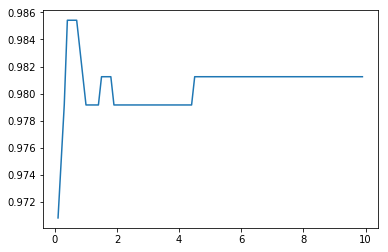

In [63]:
print('Max:', scores.max())
plt.plot(Cs, scores)

### Finding the optimal gamma for RBF kernel

In [21]:
Gs = np.arange(.1, 4, .1)
Cs = np.arange(.1, 10, .1)

steps = len(Gs) * len(Cs)
scores = np.zeros((steps))
index = 0
top = (.1, .01, 0)

for g in Gs:
    for c in Cs:
        print('%d / %d' % (index, steps))
        svc = svm.SVC(kernel='rbf', C=c, gamma=g)
        svc.fit(X_train, Y_train)
        score = svc.score(X_test, Y_test)
        scores[index] = score
        if score > top[2]:
            top = (c, g, score)
        index += 1

print('Top:', top)

0 / 3861
1 / 3861
2 / 3861
3 / 3861
4 / 3861
5 / 3861
6 / 3861
7 / 3861
8 / 3861
9 / 3861
10 / 3861
11 / 3861
12 / 3861
13 / 3861
14 / 3861
15 / 3861
16 / 3861
17 / 3861
18 / 3861
19 / 3861
20 / 3861
21 / 3861
22 / 3861
23 / 3861
24 / 3861
25 / 3861
26 / 3861
27 / 3861
28 / 3861
29 / 3861
30 / 3861
31 / 3861
32 / 3861
33 / 3861
34 / 3861
35 / 3861
36 / 3861
37 / 3861
38 / 3861
39 / 3861
40 / 3861
41 / 3861
42 / 3861
43 / 3861
44 / 3861
45 / 3861
46 / 3861
47 / 3861
48 / 3861
49 / 3861
50 / 3861
51 / 3861
52 / 3861
53 / 3861
54 / 3861
55 / 3861
56 / 3861
57 / 3861
58 / 3861
59 / 3861
60 / 3861
61 / 3861
62 / 3861
63 / 3861
64 / 3861
65 / 3861
66 / 3861
67 / 3861
68 / 3861
69 / 3861
70 / 3861
71 / 3861
72 / 3861
73 / 3861
74 / 3861
75 / 3861
76 / 3861
77 / 3861
78 / 3861
79 / 3861
80 / 3861
81 / 3861
82 / 3861
83 / 3861
84 / 3861
85 / 3861
86 / 3861
87 / 3861
88 / 3861
89 / 3861
90 / 3861
91 / 3861
92 / 3861
93 / 3861
94 / 3861
95 / 3861
96 / 3861
97 / 3861
98 / 3861
99 / 3861
100 / 3861

755 / 3861
756 / 3861
757 / 3861
758 / 3861
759 / 3861
760 / 3861
761 / 3861
762 / 3861
763 / 3861
764 / 3861
765 / 3861
766 / 3861
767 / 3861
768 / 3861
769 / 3861
770 / 3861
771 / 3861
772 / 3861
773 / 3861
774 / 3861
775 / 3861
776 / 3861
777 / 3861
778 / 3861
779 / 3861
780 / 3861
781 / 3861
782 / 3861
783 / 3861
784 / 3861
785 / 3861
786 / 3861
787 / 3861
788 / 3861
789 / 3861
790 / 3861
791 / 3861
792 / 3861
793 / 3861
794 / 3861
795 / 3861
796 / 3861
797 / 3861
798 / 3861
799 / 3861
800 / 3861
801 / 3861
802 / 3861
803 / 3861
804 / 3861
805 / 3861
806 / 3861
807 / 3861
808 / 3861
809 / 3861
810 / 3861
811 / 3861
812 / 3861
813 / 3861
814 / 3861
815 / 3861
816 / 3861
817 / 3861
818 / 3861
819 / 3861
820 / 3861
821 / 3861
822 / 3861
823 / 3861
824 / 3861
825 / 3861
826 / 3861
827 / 3861
828 / 3861
829 / 3861
830 / 3861
831 / 3861
832 / 3861
833 / 3861
834 / 3861
835 / 3861
836 / 3861
837 / 3861
838 / 3861
839 / 3861
840 / 3861
841 / 3861
842 / 3861
843 / 3861
844 / 3861
845 / 3861

1459 / 3861
1460 / 3861
1461 / 3861
1462 / 3861
1463 / 3861
1464 / 3861
1465 / 3861
1466 / 3861
1467 / 3861
1468 / 3861
1469 / 3861
1470 / 3861
1471 / 3861
1472 / 3861
1473 / 3861
1474 / 3861
1475 / 3861
1476 / 3861
1477 / 3861
1478 / 3861
1479 / 3861
1480 / 3861
1481 / 3861
1482 / 3861
1483 / 3861
1484 / 3861
1485 / 3861
1486 / 3861
1487 / 3861
1488 / 3861
1489 / 3861
1490 / 3861
1491 / 3861
1492 / 3861
1493 / 3861
1494 / 3861
1495 / 3861
1496 / 3861
1497 / 3861
1498 / 3861
1499 / 3861
1500 / 3861
1501 / 3861
1502 / 3861
1503 / 3861
1504 / 3861
1505 / 3861
1506 / 3861
1507 / 3861
1508 / 3861
1509 / 3861
1510 / 3861
1511 / 3861
1512 / 3861
1513 / 3861
1514 / 3861
1515 / 3861
1516 / 3861
1517 / 3861
1518 / 3861
1519 / 3861
1520 / 3861
1521 / 3861
1522 / 3861
1523 / 3861
1524 / 3861
1525 / 3861
1526 / 3861
1527 / 3861
1528 / 3861
1529 / 3861
1530 / 3861
1531 / 3861
1532 / 3861
1533 / 3861
1534 / 3861
1535 / 3861
1536 / 3861
1537 / 3861
1538 / 3861
1539 / 3861
1540 / 3861
1541 / 3861
1542

2142 / 3861
2143 / 3861
2144 / 3861
2145 / 3861
2146 / 3861
2147 / 3861
2148 / 3861
2149 / 3861
2150 / 3861
2151 / 3861
2152 / 3861
2153 / 3861
2154 / 3861
2155 / 3861
2156 / 3861
2157 / 3861
2158 / 3861
2159 / 3861
2160 / 3861
2161 / 3861
2162 / 3861
2163 / 3861
2164 / 3861
2165 / 3861
2166 / 3861
2167 / 3861
2168 / 3861
2169 / 3861
2170 / 3861
2171 / 3861
2172 / 3861
2173 / 3861
2174 / 3861
2175 / 3861
2176 / 3861
2177 / 3861
2178 / 3861
2179 / 3861
2180 / 3861
2181 / 3861
2182 / 3861
2183 / 3861
2184 / 3861
2185 / 3861
2186 / 3861
2187 / 3861
2188 / 3861
2189 / 3861
2190 / 3861
2191 / 3861
2192 / 3861
2193 / 3861
2194 / 3861
2195 / 3861
2196 / 3861
2197 / 3861
2198 / 3861
2199 / 3861
2200 / 3861
2201 / 3861
2202 / 3861
2203 / 3861
2204 / 3861
2205 / 3861
2206 / 3861
2207 / 3861
2208 / 3861
2209 / 3861
2210 / 3861
2211 / 3861
2212 / 3861
2213 / 3861
2214 / 3861
2215 / 3861
2216 / 3861
2217 / 3861
2218 / 3861
2219 / 3861
2220 / 3861
2221 / 3861
2222 / 3861
2223 / 3861
2224 / 3861
2225

2825 / 3861
2826 / 3861
2827 / 3861
2828 / 3861
2829 / 3861
2830 / 3861
2831 / 3861
2832 / 3861
2833 / 3861
2834 / 3861
2835 / 3861
2836 / 3861
2837 / 3861
2838 / 3861
2839 / 3861
2840 / 3861
2841 / 3861
2842 / 3861
2843 / 3861
2844 / 3861
2845 / 3861
2846 / 3861
2847 / 3861
2848 / 3861
2849 / 3861
2850 / 3861
2851 / 3861
2852 / 3861
2853 / 3861
2854 / 3861
2855 / 3861
2856 / 3861
2857 / 3861
2858 / 3861
2859 / 3861
2860 / 3861
2861 / 3861
2862 / 3861
2863 / 3861
2864 / 3861
2865 / 3861
2866 / 3861
2867 / 3861
2868 / 3861
2869 / 3861
2870 / 3861
2871 / 3861
2872 / 3861
2873 / 3861
2874 / 3861
2875 / 3861
2876 / 3861
2877 / 3861
2878 / 3861
2879 / 3861
2880 / 3861
2881 / 3861
2882 / 3861
2883 / 3861
2884 / 3861
2885 / 3861
2886 / 3861
2887 / 3861
2888 / 3861
2889 / 3861
2890 / 3861
2891 / 3861
2892 / 3861
2893 / 3861
2894 / 3861
2895 / 3861
2896 / 3861
2897 / 3861
2898 / 3861
2899 / 3861
2900 / 3861
2901 / 3861
2902 / 3861
2903 / 3861
2904 / 3861
2905 / 3861
2906 / 3861
2907 / 3861
2908

3508 / 3861
3509 / 3861
3510 / 3861
3511 / 3861
3512 / 3861
3513 / 3861
3514 / 3861
3515 / 3861
3516 / 3861
3517 / 3861
3518 / 3861
3519 / 3861
3520 / 3861
3521 / 3861
3522 / 3861
3523 / 3861
3524 / 3861
3525 / 3861
3526 / 3861
3527 / 3861
3528 / 3861
3529 / 3861
3530 / 3861
3531 / 3861
3532 / 3861
3533 / 3861
3534 / 3861
3535 / 3861
3536 / 3861
3537 / 3861
3538 / 3861
3539 / 3861
3540 / 3861
3541 / 3861
3542 / 3861
3543 / 3861
3544 / 3861
3545 / 3861
3546 / 3861
3547 / 3861
3548 / 3861
3549 / 3861
3550 / 3861
3551 / 3861
3552 / 3861
3553 / 3861
3554 / 3861
3555 / 3861
3556 / 3861
3557 / 3861
3558 / 3861
3559 / 3861
3560 / 3861
3561 / 3861
3562 / 3861
3563 / 3861
3564 / 3861
3565 / 3861
3566 / 3861
3567 / 3861
3568 / 3861
3569 / 3861
3570 / 3861
3571 / 3861
3572 / 3861
3573 / 3861
3574 / 3861
3575 / 3861
3576 / 3861
3577 / 3861
3578 / 3861
3579 / 3861
3580 / 3861
3581 / 3861
3582 / 3861
3583 / 3861
3584 / 3861
3585 / 3861
3586 / 3861
3587 / 3861
3588 / 3861
3589 / 3861
3590 / 3861
3591

## Try SGD

In [10]:
from sklearn import linear_model

sgd = linear_model.SGDClassifier(max_iter=1000)
sgd.fit(X_train, Y_train)
score = sgd.score(X_test, Y_test)
print(score)

0.939583333333


## Try kNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
score = knn.score(X_test, Y_test)
print(score)

0.960416666667


In [ ]:
Ns = range(3, 30)
scores = np.zeros((len(Ns)))
index = 0
top = (3, 0)
for n in Ns:
    print('%d / %d (%d)' % (index, len(Ns)-1, n))
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, Y_train)
    score = knn.score(X_test, Y_test)
    scores[index] = score
    if score > top[1]:
        top = (n, score)
    index += 1

print('Top:', top)

## Combining Automation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm

datasets = [
    ('Cleaned+MinMaxScaled', minmaxscaled),
    ('Cleaned+Extended+MinMaxScaled', minmaxscaled_ext)
]

options = {
    'AdaBoost': {
        'base_estimator': [
            svm.SVC(kernel='rbf', C=8.7, gamma=0.04),
            RandomForestClassifier(n_estimators=69)
        ],
        'algorithm': ['SAMME']
    },
    'SVM/C': {
        'kernel': ('linear', 'rbf'),
        'C': np.arange(.1, 12.0, .2),
        'gamma': [.001, .005, .01, .025, .05, .075, .1, .25, .5, 1, 3, 5, 8]
    },
    'RandomForest': {
        'n_estimators': range(10, 70)
    }
}

classifiers = [
#     ('AdaBoost', AdaBoostClassifier),
    ('SVM/C', svm.SVC),
#     ('RandomForest', RandomForestClassifier)
]

def search(classifiers, options, datasets, test_size, random_state):
    results = {
        'rank': [],
        'classifier': [],
        'options': [],
        'dataset': [],
        'score': []
    }

    for dataset in datasets:
        X_train, X_test, Y_train, Y_test = train_test_split(dataset[1].iloc[:,:-1], dataset[1].iloc[:,-1],\
                                                            test_size=test_size, random_state=random_state)
        
        for classifier in classifiers:
            name = classifier[0]
            print 'Testing', dataset[0], 'on', name, '...'

            model = GridSearchCV(classifier[1](), options[name], verbose=1, cv=3)
            model.fit(X_train, Y_train)
            
            print 'Params:', model.best_params_
            print 'MSE:', model.best_score_
            print
            
            results['rank'].append(0)
            results['classifier'].append(name)
            results['options'].append(str(model.best_params_))
            results['dataset'].append(dataset[0])
            results['score'].append(model.best_score_)
            
    return results

results = search(classifiers, options, datasets, .35, 123456)

In [ ]:
results_df = pd.DataFrame(results).sort_values(['score'], ascending=[False])
results_df['rank'] = pd.Series(range(1, len(results_df) + 1), index=results_df.index)
results_df[['rank', 'classifier', 'options', 'dataset', 'score']].to_csv('../classifiers/results_testsize35.csv', sep=',', encoding='utf-8', index=False)

## Confusion Matrix

('Accuracy', 0.10000000000000001)


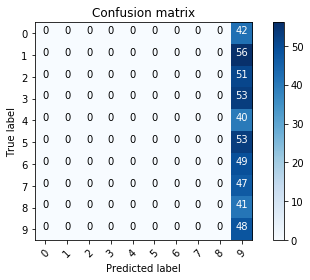

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

best = svm.SVC(kernel='rbf', C=1.5, gamma=0.2)

Y_pred = best.fit(X_train, Y_train).predict(X_test)

def plot_confusion_matrix(cm, classes):
#     print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()

print('Accuracy', best.score(X_test, Y_test))
plot_confusion_matrix(cnf_matrix, classes=range(0,10))

plt.show()